Table of contents:
1) Importing the visualization libraries
2) Importing 'cust_ords_prods_m.pkl' Dataset
3) Creating Visualizations and exporting them to 'visualization' folder
4)


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating a path
path = r'C:\Users\user\OneDrive\Documents\Instacart basket analysis Career foundry'

In [3]:
path

'C:\\Users\\user\\OneDrive\\Documents\\Instacart basket analysis Career foundry'

In [4]:
#Importing the updated Dataframe
cust_ords_prods_mviz = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'cust_ords_prods_m.pkl'))

In [5]:
pd.options.display.max_columns = None

In [7]:
cust_ords_prods_mviz.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# DESCRIPTIVE FINDINGS ABOUT SALES

In [8]:
cust_ords_prods_mviz['order_time_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_time_of_day, dtype: int64

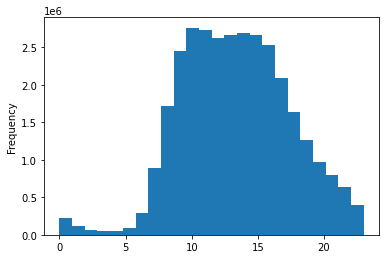

In [9]:
#Histogram of daily sales on an hourly basis
sales_hod_hist = cust_ords_prods_mviz['order_time_of_day'].plot.hist(bins = 24)

#As is visible from the histogram 
- 9 am to 17.00 hrs (i.e 9am to 5pm) are hrs of highest orders.
- most orders are placed in this time period.
- 9:00 AM is the hour of highest orders and morning 3:00AM and 4:00AM are the hours of least orders.


In [15]:
#exporting the figure
sales_hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_hod_hist.png'))

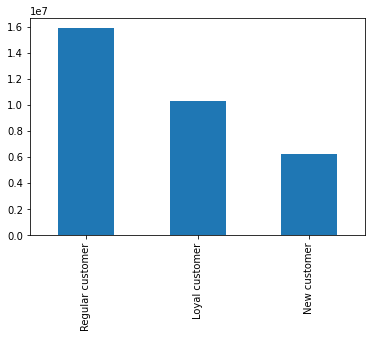

In [12]:
# creating a bar chart based on 'loyalty' of customers
loyalty_bar = cust_ords_prods_mviz['loyalty_flag'].value_counts().plot.bar()


From the bar chart it is visible that:
- Regular customers place the  highest number of orders followed by loyal customers.
- New customers place the least orders amongst the 3 customer classes.
- Although the per order price for loyal customers is high their frequency of order is lesser than the regular customers. 

In [14]:
#Exporting the figure
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [27]:
# To create a line chart of expenditure by hourly basis we need to plot the prices against the orders_time_of_day
# we first create a random sees
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_mviz)) <= 0.7

In [28]:
#save 70% of the data in the dataframe 'big'
big = cust_ords_prods_mviz[dev]

In [29]:
#store 30% of the data in Dataframe 'small'
small = cust_ords_prods_mviz[~dev]

In [30]:
len(cust_ords_prods_mviz) #checking for the length of the entire dataframe

32404859

In [31]:
len(big) + len(small) #comparing the length of sum of big and small dataframes with the original dataset

32404859

In [32]:
#Reducing the sample datasframe to only the required columns
df_2 = small[['order_time_of_day','prices']]

In [33]:
df_2.head()

,order_time_of_day,prices
0,9,9.0
2,15,9.0
3,9,12.6
6,8,12.6
10,11,4.3


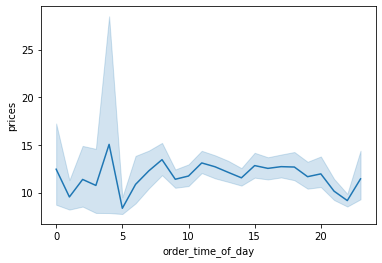

In [35]:
line_hr_exp = sns.lineplot(data = df_2, x = 'order_time_of_day', y = 'prices')

#from the line chart it is clear that
- there is great fluctuation in price expenditure between mid-night to 5:00 AM in the morning 
- After 5:00 AM the expenditure steadily rises and stays almost constant from 9:00 hrs to 20:00 hrs.


In [36]:
#Exporting the figure
line_hr_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hr_exp.png'))

In [37]:
df_3 = small[['age','dependants']]

In [38]:
df_3.head()

,age,dependants
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3


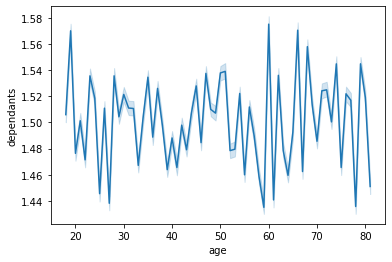

In [40]:
line_age_dep = sns.lineplot(data = df_3, x = 'age', y = 'dependants')

#Age and dependants insights
- Almost all customers between the age group of 20 to 80 yrs have 1 or 2 dependants.
- There is a great fluctuation with regards to dependants in the 20-30 and 20-80 age group categories.
- Whereas the age group of 30 to 60 yrs consistently has 1 or more dependants.

In [41]:
#Exporting the figure
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [44]:
# To determine the relationship between age and spending power lets create a dataset of age and spending flag
df_4 = small[['age','spending_flag']]

In [45]:
df_4.head()

,age,spending_flag
0,48,Low spender
2,48,Low spender
3,48,Low spender
6,48,Low spender
10,48,Low spender


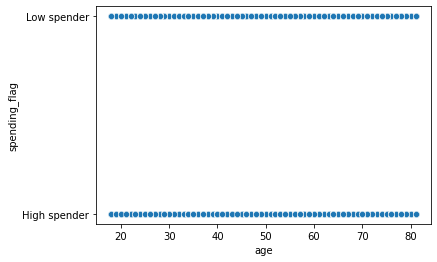

In [50]:
scp_age_sp = sns.scatterplot(data = df_4, x = 'age', y = 'spending_flag')

#Age and spending power insights
- It is obvious from the scatterplot that there are equal high and low spenders in all age groups.
- Other word we can say that age has nothinng to do with spending power.
- Low and high spenders are uniformly present in all age groups.

In [54]:
#Exporting the figure
scp_age_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scp_age_sp.png'))

In [51]:
#Let us confirm the finding of the scatterplot by creating another scatterplot of Age to mean_price
df_5 = small[['age','mean_price']]

In [52]:
df_5.head()

,age,mean_price
0,48,7.988889
2,48,7.988889
3,48,7.988889
6,48,7.988889
10,48,7.988889


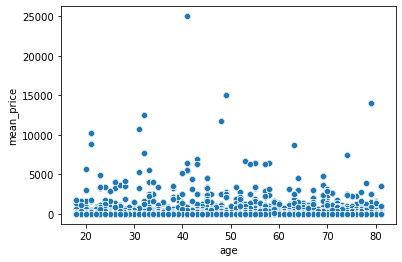

In [53]:
scp_age_mp = sns.scatterplot(data = df_5, x = 'age', y = 'mean_price')

#Findings of scatterplot 2 
- this second scatterplot confirms our findings from the previous plot that spending power has nothing to do with age.
- High and low spenders are uniformly present throughout all age groups.

In [55]:
#Exporting the figure
scp_age_mp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scp_age_mp.png'))